# <center>The Sparks Foundation II GRIPJUNE21</center>

# ![](sparksfoundation.png)

### TASK-2: Prediction using Unsupervised ML

### Author: HARSH AGARWAL (Data Science and Business Analytics)

[![Linkedin](https://i.stack.imgur.com/gVE0j.png) LinkedIn](https://www.linkedin.com/in/harsh-agarwal-a23819200/)
&nbsp;
[![GitHub](https://i.stack.imgur.com/tskMh.png) GitHub](https://github.com/harsh219)

#### Task: To predict the optimum number of clusters from the 'Iris' dataset.


# K-Means Clustering

K means is one of the most popular Unsupervised Machine Learning Algorithms Used for Solving Classification Problems. **K Means segregates the unlabeled data into various groups, called clusters, based on having similar features, common patterns.**

# ![](K-Means.png)


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
iris = pd.read_csv('data\Iris.csv')

### Exploring Data

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(f'Our dataset has {iris.shape[0]} rows and {iris.shape[1]} columns')

Our dataset has 150 rows and 6 columns


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Dropping Id column

Our dataset has Id column which is of no use in model building

In [7]:
iris.drop('Id', axis=1, inplace=True)

### Summarizing  Data

In [8]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Calculating Null Values

In [9]:
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data has no null values

### Different Species of Iris Flower

Number of records of each species

In [10]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

<img src="Iris.png" width="700">

### Removing Dupliacte Rows

In [11]:
iris.duplicated().sum()

3

In [12]:
iris.drop_duplicates(inplace=True)
print(f'Number of rows after deleting duplicate rows are {iris.shape[0]}')

Number of rows after deleting duplicate rows are 147


In [13]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

### Multivariate Analysis on Iris Dataset

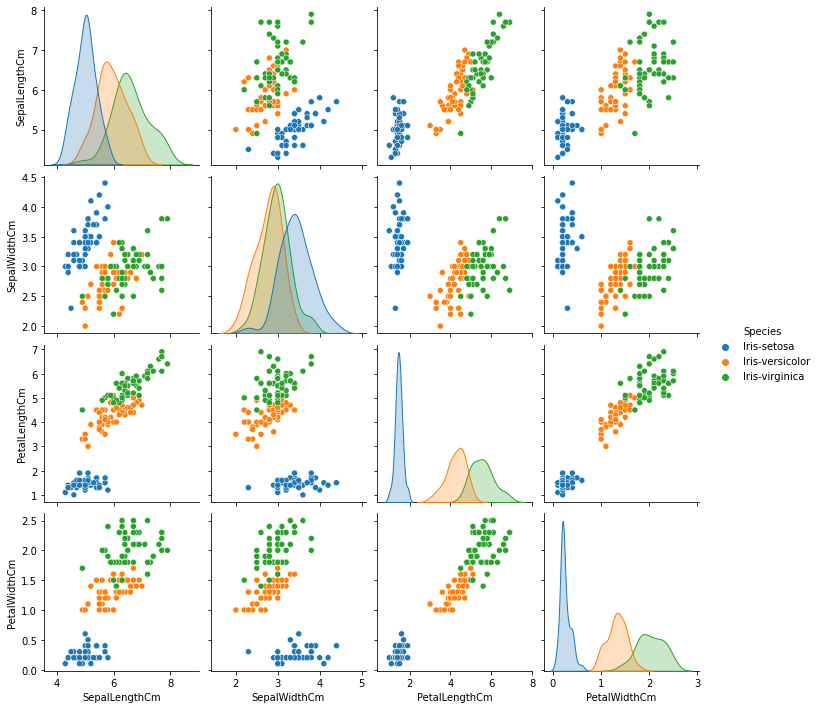

In [14]:
sns.pairplot(iris, hue='Species')
plt.show()

There is a strong linear relationship between Petal Leangth and Petal Width

### Bivariate Analysis

Distribution of each point from its mean value for every Species

#### Swarm Plot

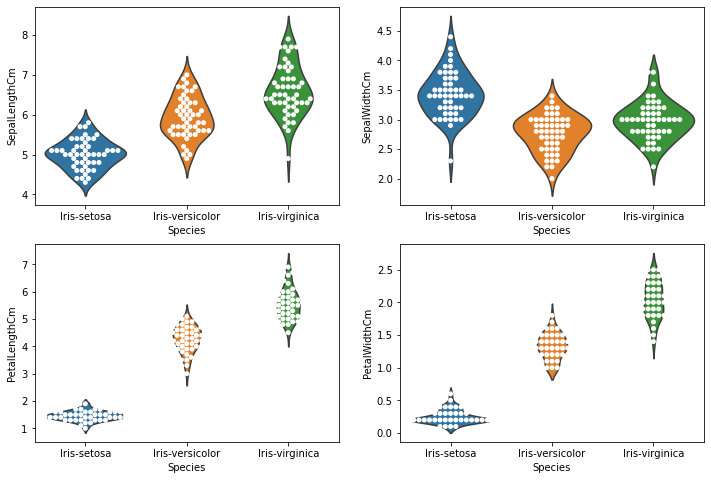

In [15]:
figure,ax = plt.subplots(2,2, figsize=(12, 8))
k=0
for i in range(2):
    for j in range(2):
        sns.violinplot(x='Species', y=iris.columns[k], data=iris, ax=ax[i][j], inner=None)
        sns.swarmplot(x='Species', y=iris.columns[k], data=iris, ax=ax[i][j], color='white', edgecolor='gray')
        k+=1
plt.show()

#### Point Plot

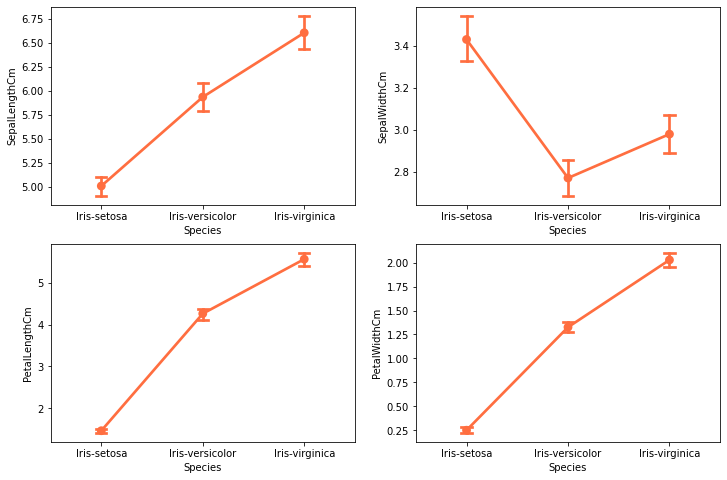

In [16]:
figure,ax = plt.subplots(2,2, figsize=(12, 8))
k=0
for i in range(2):
    for j in range(2):
        sns.pointplot(x='Species', y=iris.columns[k], data=iris, ax=ax[i][j], markers='o', capsize=0.1, color='#ff6e40', )
        k+=1
plt.show()

### Univariate Analysis

In [17]:
plt.style.use('fivethirtyeight')

#### Boxplot helps in finding outliers

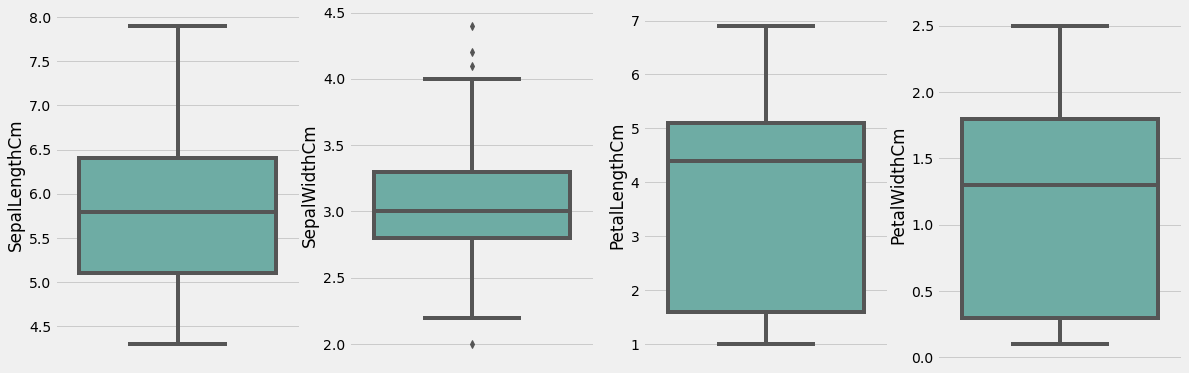

In [18]:
figure,ax = plt.subplots(1,4, figsize=(18,6))
for i in range(4):
    sns.boxplot(y=iris.columns[i], data=iris, ax=ax[i], color='#64b6ac')
plt.show()

Sepal With column has outliers

### Removing Outliers

In [19]:
q1, q3 = np.percentile(iris['SepalWidthCm'],[25,75])
iqr = q3 - q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
iris['SepalWidthCm'] = iris['SepalWidthCm'].apply(lambda x: lower_fence if x < lower_fence 
                                                  else upper_fence if x > upper_fence else x)

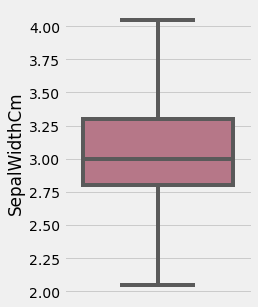

In [20]:
plt.figure(figsize=(3,5))
sns.boxplot(y='SepalWidthCm', data=iris, color='#c06c84')
plt.show()

### Finding Correlation between Properties

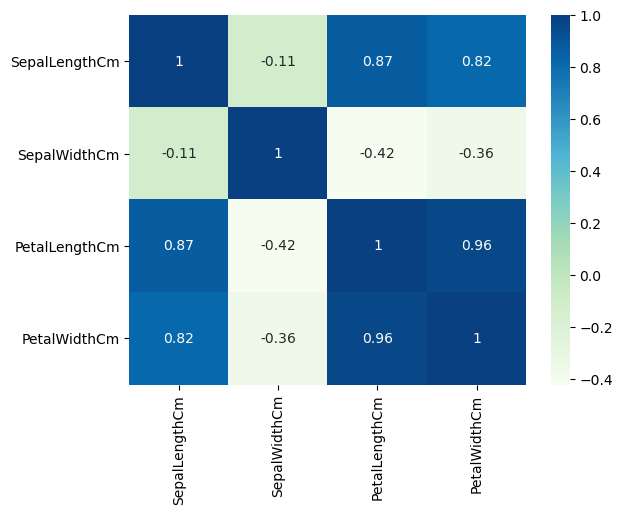

In [21]:
plt.style.use('default')
sns.heatmap(iris.corr(), annot=True, cmap='GnBu')
plt.show()

As we have seen in Pair plot Petal Width and Petal Length are highly correlated

### Preparing data for model

Removing Species column for model creation

In [22]:
x = iris.iloc[:,:-1]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Algorithm steps Of K Means <br>

**Step-1**: Select the value of K, to decide the number of clusters to be formed.<br><br>
  
**Step-2**: Select random K points which will act as centroids.<br><br>

**Step-3**: Assign each data point, based on their distance from the randomly selected points (Centroid), to the nearest/closest centroid which will form the predefined clusters.<br><br>

**Step-4**: place a new centroid of each cluster.<br><br>

**Step-5**: Repeat step no.3, which reassign each datapoint to the new closest centroid of each cluster.<br><br>

**Step-6**: If any reassignment occurs, then go to step-4 else go to Step 7.<br><br>

**Step-7**: FINISH

### Custom Class for K-Means Clustering

In [23]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=500):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def fit(self, data):
        
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data.iloc[i]
        
        for i in range(self.max_iter):
            
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
                
            for featureset in data.iterrows():
                distances = [np.linalg.norm(featureset[1]-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset[1].tolist())
                
            prev_centroids = self.centroids.copy()
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
            
            optimized = False
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) <= self.tol:
                    optimized = True
                
            if optimized:
                self.cluster_centers_ = np.array([i for i in self.centroids.values()])
                self.labels_=[]
                for index,row in data.iterrows():
                    for i in self.classifications:
                        if row.tolist() in self.classifications[i]:
                            self.labels_.append(i)
                break
                
            
                
            
    def predict(self, data):
        distances = [np.linalg.norm(featureset[1]-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
        

### Elbow Method to find Optimum Number of Clusters

Elbow Method is an empirical method to find the optimal number of clusters for a dataset. In this method, we pick a range of candidate values of k, then apply K-Means clustering using each of the values of k. Find the average distance of each point in a cluster to its centroid, and represent it in a plot. Pick the value of k, where **the average distance falls suddenly**.

In [24]:
plt.style.use('default')

In [25]:
from sklearn.cluster import KMeans

In [26]:
cluster_range = range(1,11)

sum_of_square_of_distance_within_cluster = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    sum_of_square_of_distance_within_cluster.append(kmeans.inertia_)

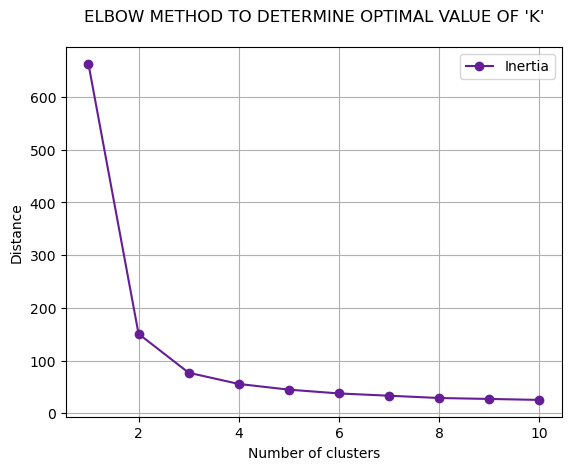

In [27]:
plt.plot(cluster_range, sum_of_square_of_distance_within_cluster, 'o-', color='#661D98', label='Inertia')
plt.title("ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K'\n")
plt.xlabel('Number of clusters')
plt.ylabel('Distance')
plt.legend()
plt.grid()
plt.show()

#### Observation from above Elbow Plot

We can select **2 or 3** as our value of k but we are not sure to choose which one

### Silhouette Method

Silhouette is a measure of how a clustering algorithm has performed. After computing the silhouette coefficient of each point in the dataset, plot it to get a visual representation of how well the dataset is clustered into k clusters. <br>
The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like the number of clusters visually. This measure has a range of [-1, 1].

Important Points:
* The Silhouette coefficient of +1 __:__  indicates that the sample is far away from the neighboring clusters.

* The Silhouette coefficient of 0 __:__  indicates that the sample is on or very close to the decision boundary between two neighboring clusters. 

* Silhouette coefficient <0 __:__  indicates that those samples might have been assigned to the wrong cluster or are outliers.

In [28]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n in cluster_range[1:]:
    kmeans = K_Means(k=n)
    kmeans.fit(x)
    silhouette_scores.append(silhouette_score(x,kmeans.labels_))

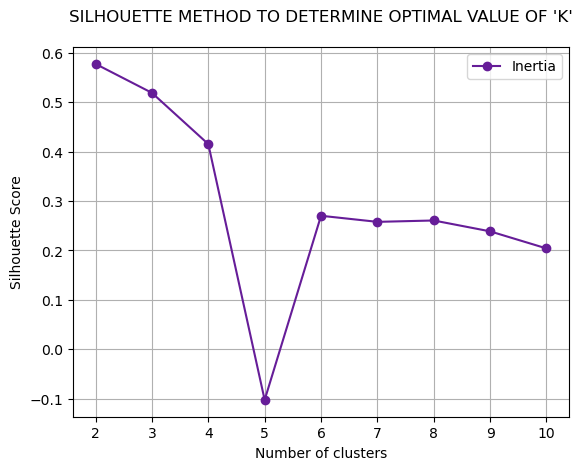

In [29]:
plt.plot(cluster_range[1:], silhouette_scores, 'o-', color='#661D98', label='Inertia')
plt.title("SILHOUETTE METHOD TO DETERMINE OPTIMAL VALUE OF 'K'\n")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid()
plt.show()

In [30]:
!pip install yellowbrick

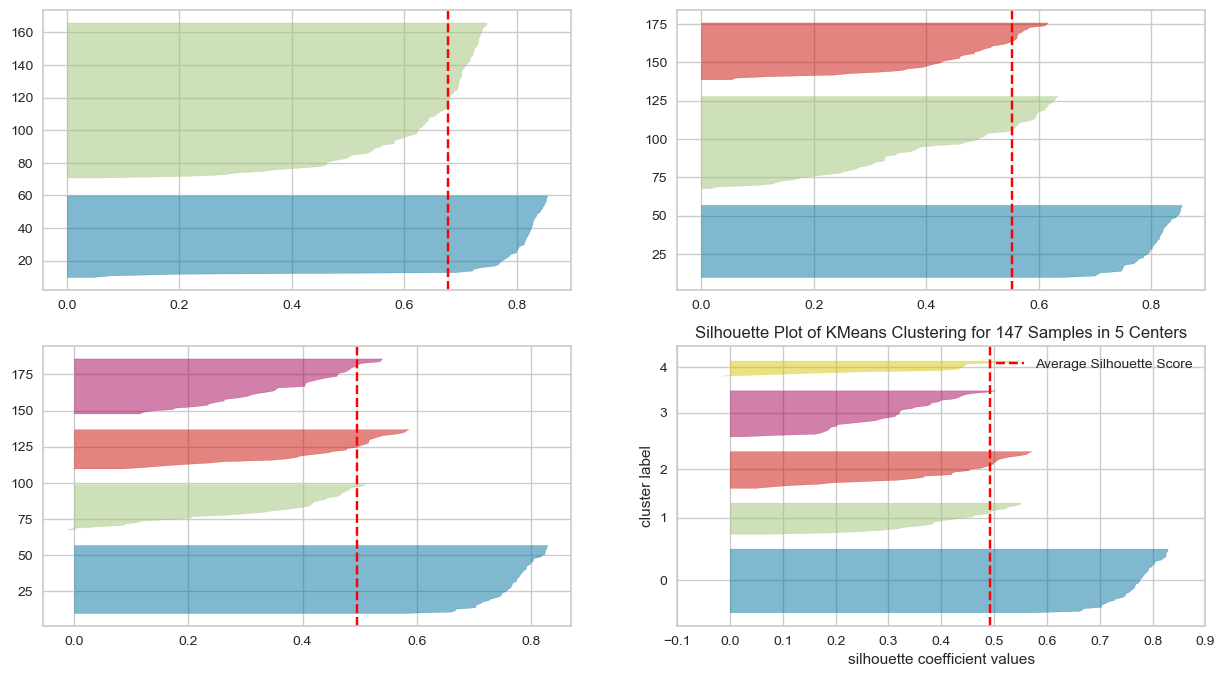

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 147 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=500, random_state=42)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)
    
visualizer.show()

#### Observations from above Silhouette Plots

* The silhouette plot shows that the n_cluster value of 4 is a bad pick, as all the points in the cluster with cluster_label=3 are below-average silhouette scores and have outliers.<br><br>

* The silhouette plot shows that the n_cluster value of 5 is a bad pick, as all the points in the cluster with cluster_label=1 and 2 are below-average silhouette scores and have outliers.<br><br>

* Silhouette analysis is more ambivalent in deciding between 2 and 3.<br><br>

* The thickness of the silhouette plot for the cluster with cluster_label=1 when n_clusters=2, is bigger in size owing to the grouping of the 2 sub-clusters into one big cluster.<br><br>

* For **n_clusters=3**, all the plots are more or less of similar thickness and hence are of similar sizes, as can be considered as best ‘k’.

### Fitting data to Model

In [32]:
clf = K_Means(k=3)
clf.fit(x)

### Plotting the Clusters with their Centers

In [43]:
colors=['red' if x==0 else 'green' if x==1 else 'blue'for x in clf.labels_]

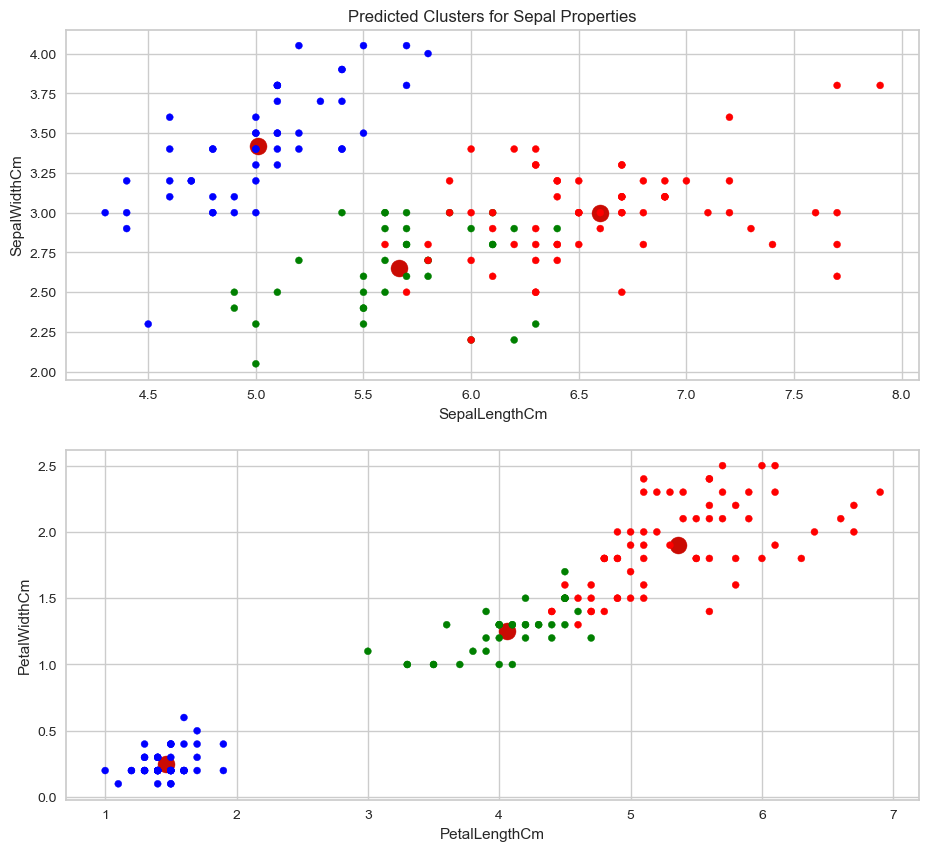

In [45]:
plt.figure(figsize=(11,10))

plt.subplot(2,1,1)
plt.scatter(clf.cluster_centers_[:,0], clf.cluster_centers_[:,1], marker='o', c='r', s=150)
plt.scatter(x='SepalLengthCm', y='SepalWidthCm', data=iris, marker='.', s=100, c=colors)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Predicted Clusters for Sepal Properties')

plt.subplot(2,1,2)
plt.scatter(clf.cluster_centers_[:,2], clf.cluster_centers_[:,3], marker='o', c='r', s=150)
plt.scatter(x='PetalLengthCm', y='PetalWidthCm', data=iris, marker='.', s=100, c=colors)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

plt.show()

### Cluster Centers and Labels

In [46]:
print('Cluster Centers: \n', clf.cluster_centers_, end='\n\n')
print('Cluster Labels: \n', clf.labels_)

Cluster Centers: 
 [[6.596875   2.9953125  5.3640625  1.903125  ]
 [5.66285714 2.65285714 4.06285714 1.25428571]
 [5.01041667 3.41979167 1.4625     0.25      ]]

Cluster Labels: 
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Adding Predicted Cluster Value as a New Column

In [47]:
iris['Cluster'] = clf.labels_
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster,Species_Encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,2,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2,2


### Comparing Predicted 
Cluster with Original Species

In [48]:
iris.loc[iris.Species == 'Iris-setosa']['Cluster'].value_counts()

2    48
Name: Cluster, dtype: int64

In [49]:
iris.loc[iris.Species == 'Iris-versicolor']['Cluster'].value_counts()

1    34
0    16
Name: Cluster, dtype: int64

16 Wrong Predictions

In [50]:
iris.loc[iris.Species == 'Iris-virginica']['Cluster'].value_counts()

0    48
1     1
Name: Cluster, dtype: int64

1 Wrong Prediction

#### Labels of Species

* 0 - Virginica
* 1 - Versicolor
* 2 - Setosa

### Adding Actual Cluster values to Our Dataset

In [51]:
iris['Species_Encoded'] = iris['Species'].apply(lambda x: 2 if x=='Iris-setosa' else 1 if x=='Iris-versicolor' else 0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster,Species_Encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,2,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2,2


### Rows with Wrong Predictions

In [52]:
iris[iris.Cluster!=iris.Species_Encoded]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster,Species_Encoded
50,7.0,3.2,4.7,1.4,Iris-versicolor,0,1
51,6.4,3.2,4.5,1.5,Iris-versicolor,0,1
52,6.9,3.1,4.9,1.5,Iris-versicolor,0,1
54,6.5,2.8,4.6,1.5,Iris-versicolor,0,1
56,6.3,3.3,4.7,1.6,Iris-versicolor,0,1
58,6.6,2.9,4.6,1.3,Iris-versicolor,0,1
63,6.1,2.9,4.7,1.4,Iris-versicolor,0,1
65,6.7,3.1,4.4,1.4,Iris-versicolor,0,1
70,5.9,3.2,4.8,1.8,Iris-versicolor,0,1
72,6.3,2.5,4.9,1.5,Iris-versicolor,0,1


### Model Evaluation

In [53]:
from sklearn.metrics import classification_report
print(classification_report(iris.Species_Encoded, iris.Cluster))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85        49
           1       0.97      0.68      0.80        50
           2       1.00      1.00      1.00        48

    accuracy                           0.88       147
   macro avg       0.91      0.89      0.88       147
weighted avg       0.91      0.88      0.88       147



### Confusion Matrix

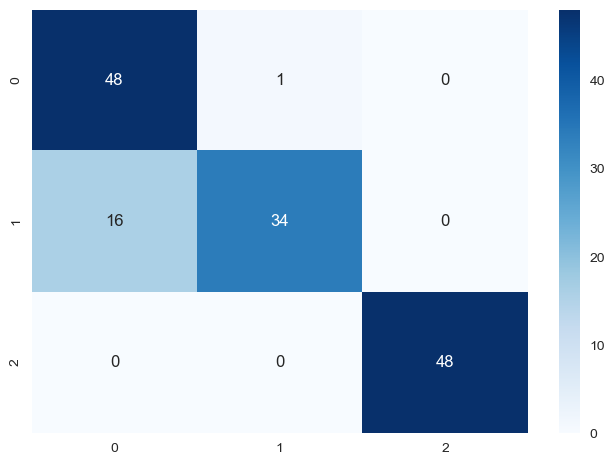

In [54]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(iris.Species_Encoded, iris.Cluster), annot=True, cmap='Blues')
plt.show()

### Final Observation

* Optimum number of clusters are **3**
* The model has a total of **17 wrong predictions** -
    * 16 versicolor species were predicted as virginica
    * 1 virginica species was predicted as versicolor